In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('D:\JupyterFile\Lenna.png')

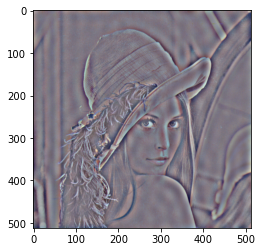

In [18]:
#Low-pass filter
def lowpass_filter(img,k=15):
    rows,cols = img.size
    rgb = np.array(img)
    imgfil = np.zeros([rows,cols,3])
    imgnew = np.zeros([rows,cols,3])
    for n in range(3):
        f = np.fft.fft2(rgb[:,:,n])
        frgb = np.fft.fftshift(f)
        for i in range(rows):
            for j in range(cols):
                if (i - int((rows - 1)/2))**2 + (j - int((cols - 1)/2))**2 <= k**2:
                    frgb[i,j] = 0
        frgb = np.fft.fftshift(frgb)
        frgb = np.fft.ifft2(frgb)
        imgfil[:,:,n] = frgb.real
        filmax = np.max(imgfil[:,:,n])
        filmin = np.min(imgfil[:,:,n])
        for x in range(rows):
            for y in range(cols):
                imgnew[x,y,n] = 255*(imgfil[x,y,n] - filmin)/(filmax - filmin)
    return Image.fromarray(np.uint8(imgnew))
plt.imshow(lowpass_filter(img))

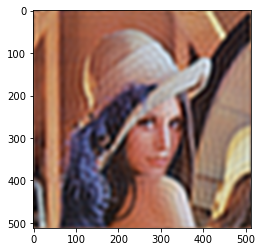

In [20]:
#High-pass filter
def highpass_filter(img,k=30):
    rows,cols = img.size
    rgb = np.array(img)
    imgfil = np.zeros([rows,cols,3])
    imgnew = np.zeros([rows,cols,3])
    for n in range(3):
        f = np.fft.fft2(rgb[:,:,n])
        frgb = np.fft.fftshift(f)
        for i in range(rows):
            for j in range(cols):
                if (i - int((rows - 1)/2))**2 + (j - int((cols - 1)/2))**2 > k**2:
                    frgb[i,j] = 0
        frgb = np.fft.fftshift(frgb)
        frgb = np.fft.ifft2(frgb)
        imgfil[:,:,n] = frgb.real
        filmax = np.max(imgfil[:,:,n])
        filmin = np.min(imgfil[:,:,n])
        for x in range(rows):
            for y in range(cols):
                imgnew[x,y,n] = 255*(imgfil[x,y,n] - filmin)/(filmax - filmin)
    return Image.fromarray(np.uint8(imgnew))
plt.imshow(highpass_filter(img))